In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\DT User3\Desktop\Petar\EDA\tmdb_5000_movies.csv")
print(data.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
data.isnull().sum()


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [6]:
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

In [7]:
# For text columns, replace missing values with a placeholder
text_columns = ['overview', 'tagline', 'homepage']  # Specify text columns
for col in text_columns:
    data[col] = data[col].fillna("No Data Available")  # Replace NaN with a placeholder


In [8]:
# Fill missing release_date with a placeholder value (e.g., "Unknown" or a specific date)
data['release_date'] = data['release_date'].fillna("Unknown")  # Replace NaN with "Unknown"


In [9]:
data.isnull().sum()


budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [10]:
print(data.describe())


             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4803.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.874245   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.607364   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   117.500000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max      

In [11]:
data = data.drop_duplicates()

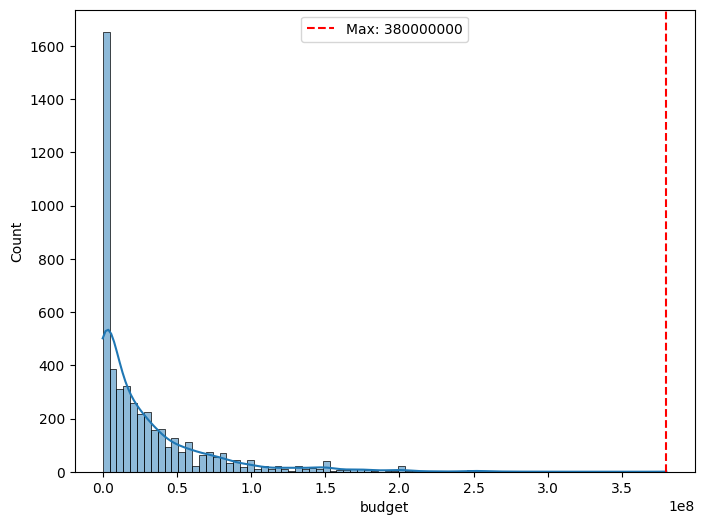

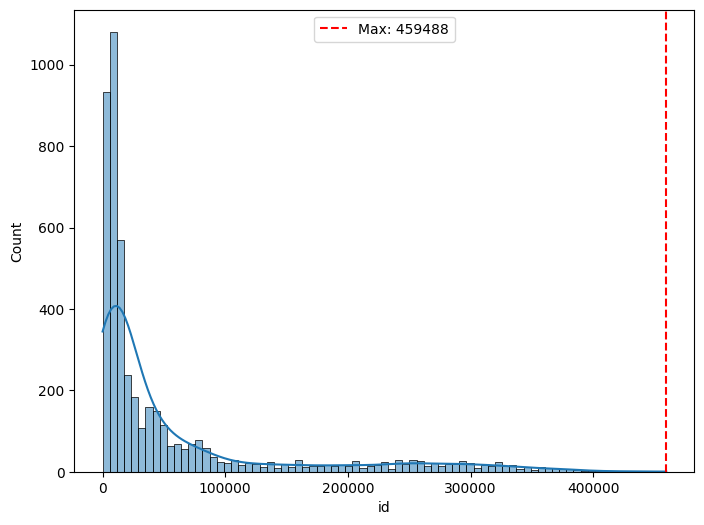

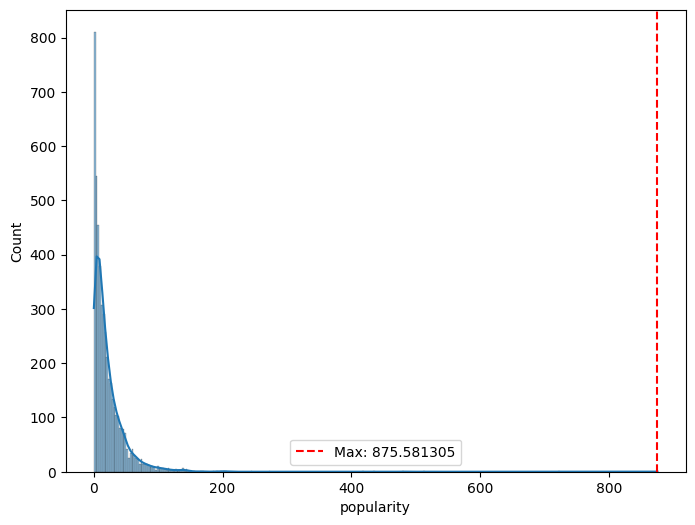

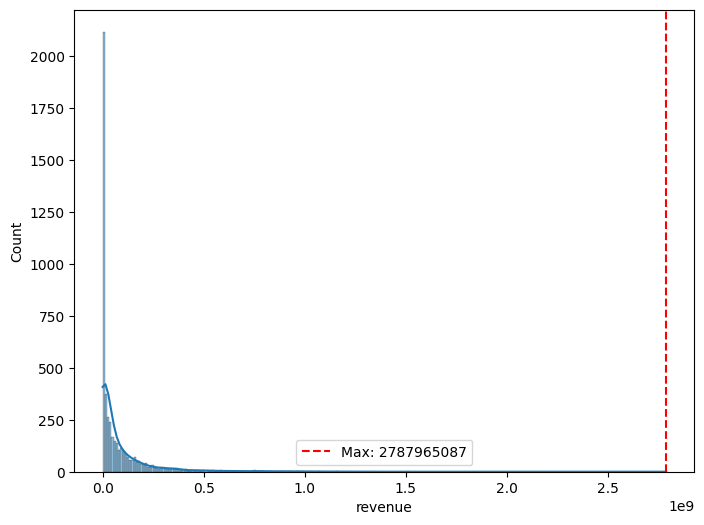

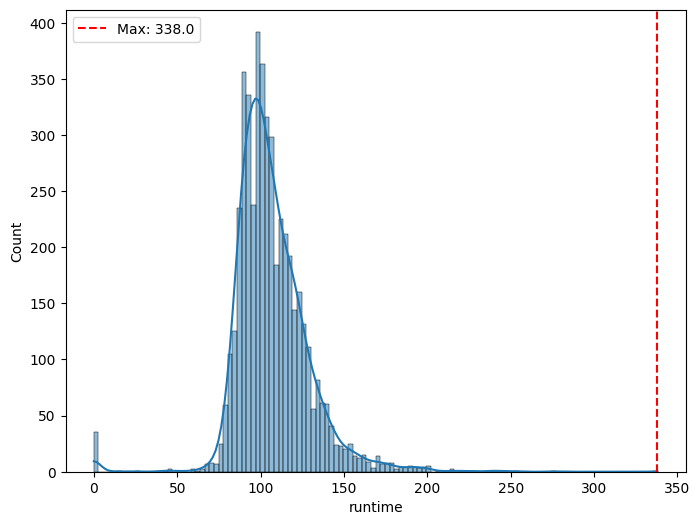

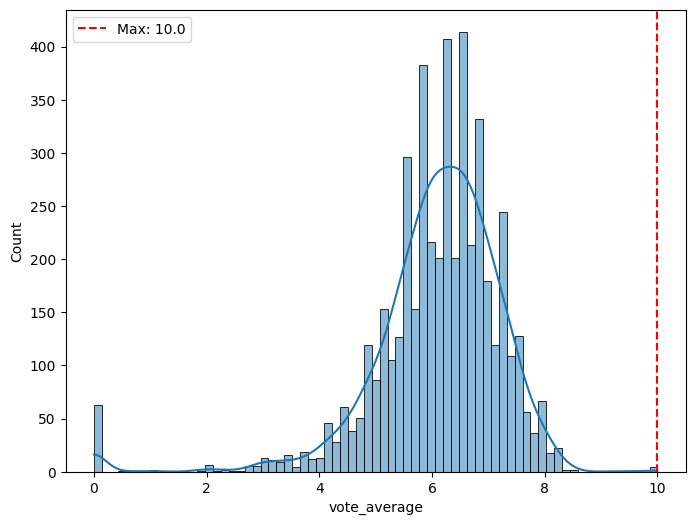

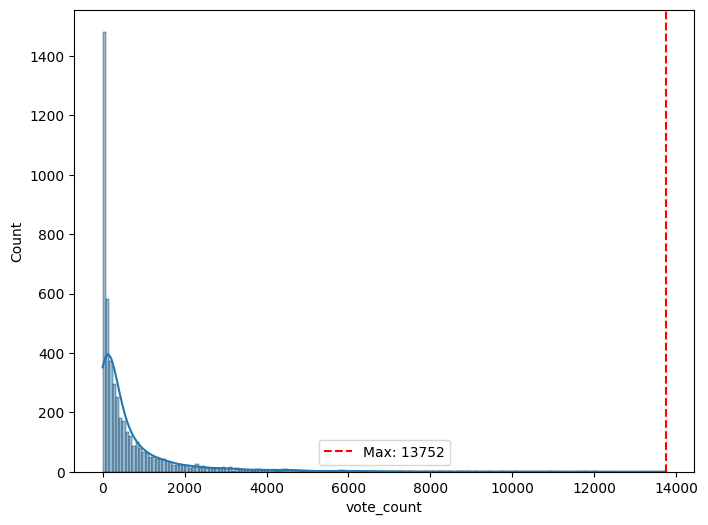

In [12]:
for col in numerical_cols:
    max_budget = data[col].max()
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    
    plt.axvline(max_budget, color='red', linestyle='--', label=f'Max: {max_budget}')
    plt.legend()
    plt.show()

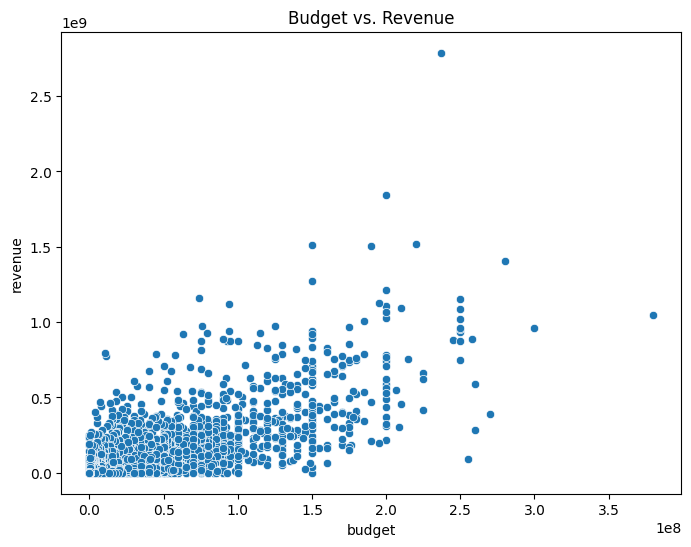

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='budget', y='revenue')
plt.title('Budget vs. Revenue')
plt.show()


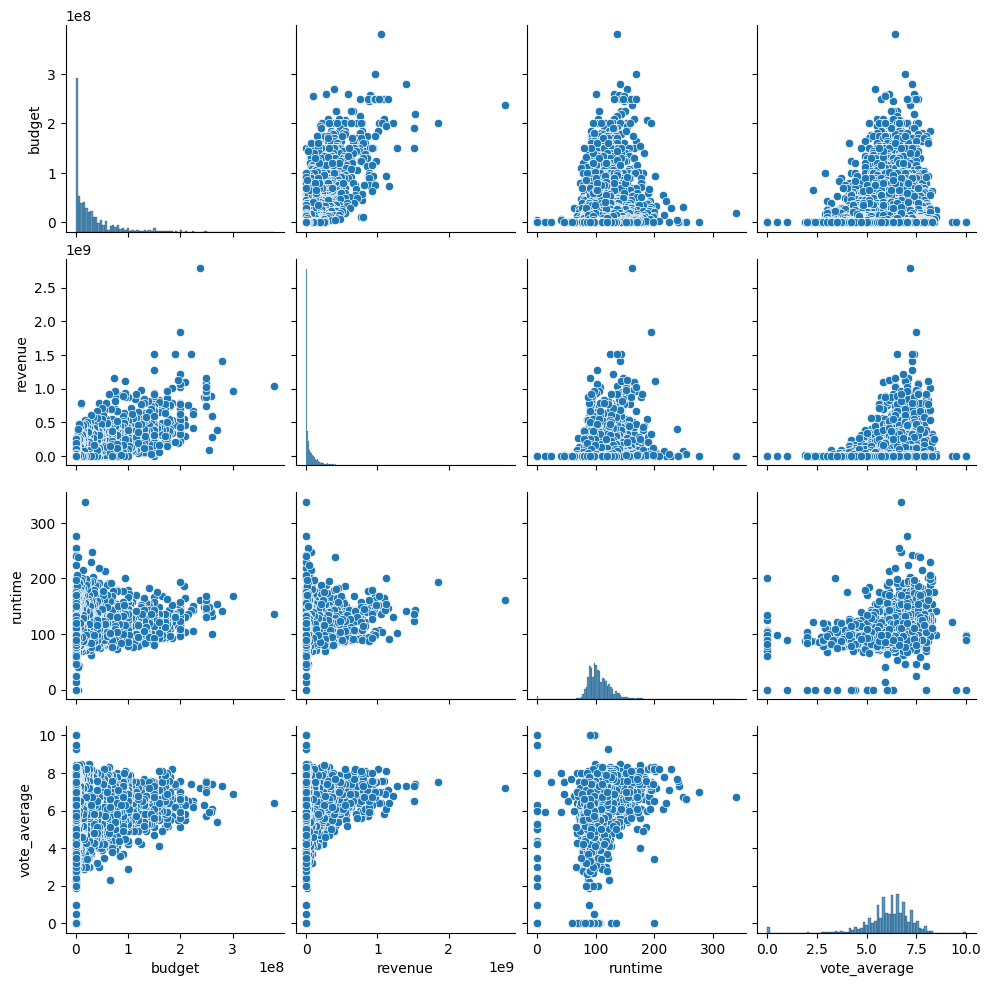

In [14]:
# Pairplot for multiple numerical columns
sns.pairplot(data[['budget', 'revenue', 'runtime', 'vote_average']])
plt.show()


In [15]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title'],
      dtype='object')


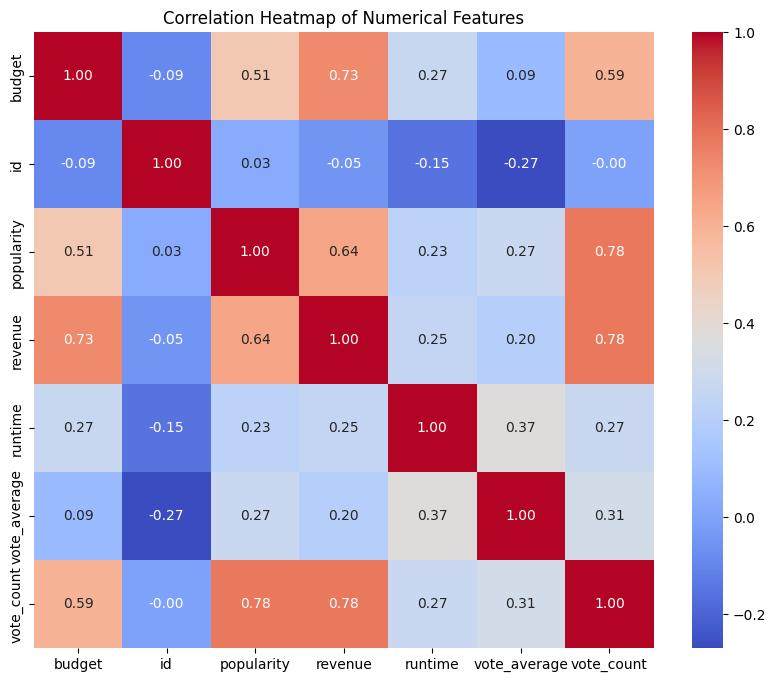

In [17]:
# Correlation Heatmap for Numerical Data
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


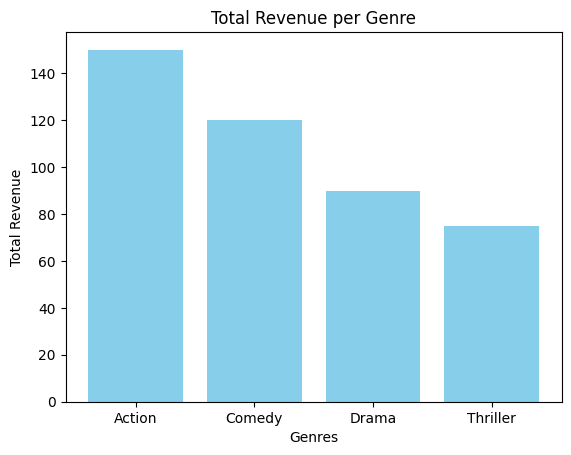

In [20]:

# Example data: genres and corresponding total revenue
genres = ['Action', 'Comedy', 'Drama', 'Thriller']
revenue = [150, 120, 90, 75]

# Create a bar plot
plt.bar(genres, revenue, color='skyblue')

# Adding title and labels
plt.title('Total Revenue per Genre')
plt.xlabel('Genres')
plt.ylabel('Total Revenue')

# Display the plot
plt.show()
